In [10]:
#Part 2

Initial bias  0
epochs and learning rate  10000 0.001
final weights  [[ 2.1293702 ]
 [ 4.63277473]
 [-1.21735203]
 [-0.18113876]
 [ 0.17388949]
 [ 2.14929501]
 [ 1.41380376]
 [ 1.34925889]]
wo  -4.86728359819199
Calculations done on validation data
Accuracy is  75.80645161290323  %
Calculations done on testing data
Accuracy is  76.42276422764228  %


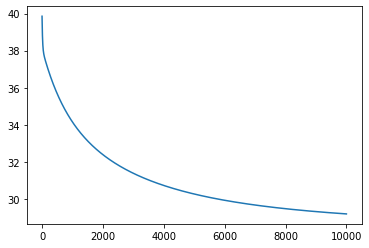

In [297]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import preprocessing

#reading the dataset
preData = pd.read_csv("diabetes.csv")
preData.head()
data_normalized = (preData - np.min(preData))/(np.max(preData)-np.min(preData))

#data = preprocessing.normalize(preData, axis=0)
data = data_normalized 
#data = pd.DataFrame(data, columns=preData.columns)
features = np.asmatrix(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
target = np.asmatrix(data['Outcome']).T
#splitting the dataset into training(60%), validation(20%) and testing(rest) using sklearn
#first splitting dataset into 2 sets, 1 is training i.e 60% and the 2nd one is temp dataset which is 40%
X_training, X_temp, Y_training, Y_temp = train_test_split(features,target, test_size=0.40)
#again splitting the temp data into 2 portions, 1 is validation(20$) and rest for testing
X_testing,X_validation,Y_testing,Y_validation = train_test_split(X_temp, Y_temp, test_size=0.20)
#creating the weight matrix
w = np.asmatrix([0,0,0,0,0,0,0,0]).T
n = 8
epochs =10000
learningRate = 0.001
#setting the bias w0 as 0 initially
w0 = 0
print("Initial bias ",w0)
lossFunction= [] 
for iteration in range(epochs):
    #predicting the outcome
    Y_predictedTemp = 1/(1+ np.exp(-w0-np.dot(w.T,X_training.T)))
    Y_predicted = Y_predictedTemp.T
    #generating the gradient desc
    gradient_desc = np.dot(X_training.T,(Y_predicted-Y_training))
    #updating bias and weights using gradient descent
    w0 = w0 - learningRate*(np.sum(Y_predicted - Y_training)/n)
    w = w - learningRate * gradient_desc/n
    cost = -np.sum(np.multiply(np.log(Y_predicted), Y_training) + np.multiply((1 - Y_training), np.log(1 - Y_predicted)))/n
    lossFunction.append(np.squeeze(cost)) 
print("epochs and learning rate ",epochs,learningRate)
print("final weights ",w)
print("wo ",w0)
#predicting the outcome using validation dataset with the weights found using training dataset
Y_predictedTemp = 1/(1+ np.exp(-w0-np.dot(w.T,X_validation.T)))
Y_predicted = Y_predictedTemp.T
#converting the predicted outcome probabilities into binary form
predictedTest = Y_predicted.round()
print("Calculations done on validation data")
properly_Predicted = 0
#calculating the accuray using validation dataset
for i in range(len(Y_validation)):
    if(predictedTest[i]==Y_validation[i][0]):
        properly_Predicted = properly_Predicted+1

accuracy = properly_Predicted/len(Y_validation)
print("Accuracy is ",accuracy*100," %")
#predicting the outcome using testing dataset with the weights found using training dataset
Y_predictedTemp = 1/(1+ np.exp(-w0-np.dot(w.T,X_testing.T)))
Y_predicted = Y_predictedTemp.T
#converting the predicted outcome probabilities into binary form
predictedTest = Y_predicted.round()
print("Calculations done on testing data")
properly_Predicted = 0
#calculating the accuray using testing dataset
for i in range(len(Y_testing)):
    if(predictedTest[i]==Y_testing[i][0]):
        properly_Predicted = properly_Predicted+1

accuracy = properly_Predicted/len(Y_testing)
print("Accuracy is ",accuracy*100," %")
plt.plot(lossFunction)

In [100]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam,Adadelta
from keras import regularizers
from keras.layers import Dropout

In [316]:
# Part 2 and 3
model = Sequential()
lambdaVal = 0.00001
inputUnits = 8
hidden1Unit = 50 #number of nodes on each layer
hidden2Unit = 50
hidden3Unit = 50
dropOutVal = 0.3 #probability of removing nodes
model.add(Dense(hidden1Unit, activation='relu', input_dim=inputUnits))  # Hidden layer.
model.add(Dropout(dropOutVal))
#model.add(Dense(units=32,kernel_regularizer=regularizers.l1(lambdaVal),bias_regularizer=regularizers.l1(lambdaVal),activity_regularizer=regularizers.l1(lambdaVal)))
#model.add(Dense(units=32,kernel_regularizer=regularizers.l2(lambdaVal),bias_regularizer=regularizers.l2(lambdaVal),activity_regularizer=regularizers.l2(lambdaVal)))
model.add(Dense(hidden1Unit, activation='relu')) # Hidden layer.
model.add(Dropout(dropOutVal))
#model.add(Dense(units=32,kernel_regularizer=regularizers.l1(lambdaVal),bias_regularizer=regularizers.l1(lambdaVal),activity_regularizer=regularizers.l1(lambdaVal)))
#model.add(Dense(units=32,kernel_regularizer=regularizers.l2(lambdaVal),bias_regularizer=regularizers.l2(lambdaVal),activity_regularizer=regularizers.l2(lambdaVal)))
model.add(Dense(hidden1Unit, activation='relu')) # Hidden layer.
model.add(Dropout(dropOutVal))
#model.add(Dense(units=32,kernel_regularizer=regularizers.l1(lambdaVal),bias_regularizer=regularizers.l1(lambdaVal),activity_regularizer=regularizers.l1(lambdaVal)))
#model.add(Dense(units=32,kernel_regularizer=regularizers.l2(lambdaVal),bias_regularizer=regularizers.l2(lambdaVal),activity_regularizer=regularizers.l2(lambdaVal)))
model.add(Dense(1, activation='sigmoid'))  # Output layer.(Since there is only 1 class)
learningRate = 0.0001
#optimizer = Adadelta(learningRate)
optimizer = Adam(learning_rate=learningRate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
batch_size = 12
epochs = 50
history = model.fit(X_training, Y_training,
                    validation_data=(X_validation, Y_validation), epochs=epochs, batch_size=batch_size)

# Evaluating the model
#evaluation is done using testing dataset
loss, accuracy = model.evaluate(X_testing, Y_testing)
print('\n\n Loss', loss, 'Accuracy:', accuracy)
print("dropout regularization")
print("optimizer",optimizer)
print("dropOutVal",dropOutVal)
print("learning rate",learningRate)
print("Epoch",epochs,"batch size",batch_size)
#print("lambda",lambdaVal)
print("Hidden layer units ",hidden1Unit,hidden2Unit,hidden3Unit)

Model: "sequential_189"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1059 (Dense)           (None, 50)                450       
_________________________________________________________________
dropout_161 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_1060 (Dense)           (None, 50)                2550      
_________________________________________________________________
dropout_162 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_1061 (Dense)           (None, 50)                2550      
_________________________________________________________________
dropout_163 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_1062 (Dense)           (None, 1)              

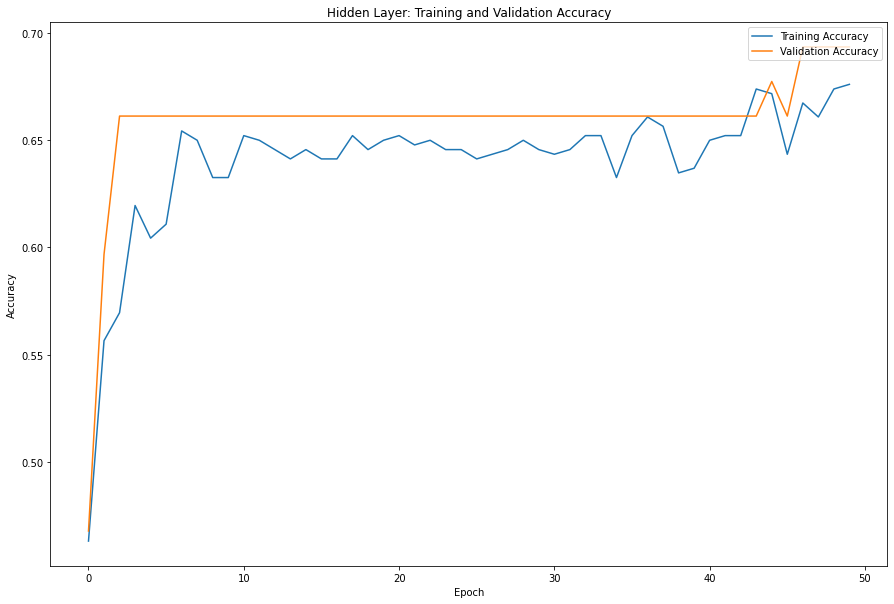

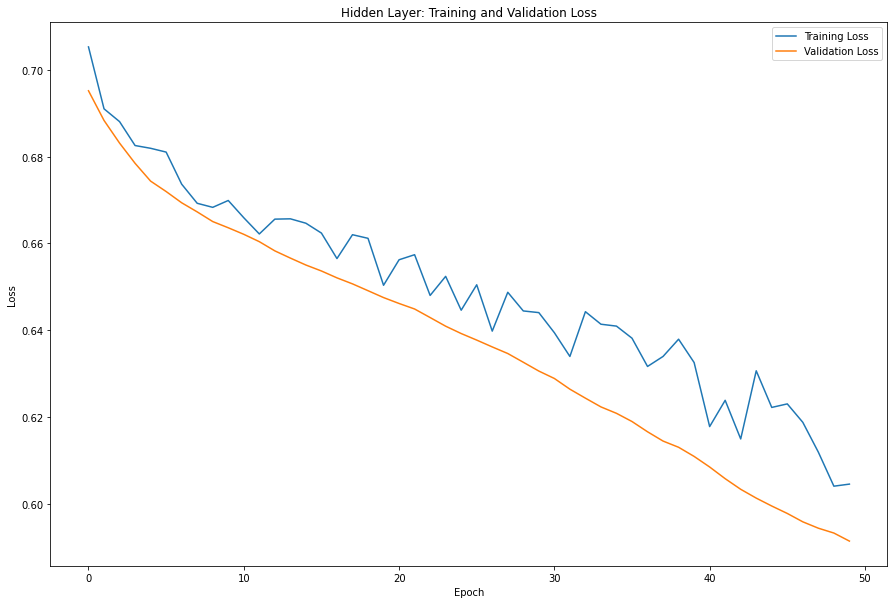

In [317]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Hidden Layer: Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Hidden Layer: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [9]:
import numpy as np
import pandas as pd

data = pd.read_csv("diabetes.csv")
print(data)
print(data.shape)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [10]:
preData = data.head()
print(preData.shape)

(5, 9)
